# Projet : L'Enquête sur les Données Mobiles (2025)
**Auteur :** Terrel NUENTSA **Objectif :** Analyser le jeu de données "Global Mobile Prices" pour identifier les facteurs influençant le prix (RAM, Stockage, Marque).

## Étape 1 : Chargement et Nettoyage des Données
La première étape consiste à charger les données et à évaluer leur qualité.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df = pd.read_csv("Global_Mobile_Prices_2025_Extended.csv")

# 1. Vérifier la structure et les valeurs manquantes
print("--- Structure Initiale (df.info()) ---")
df.info()

# 2. Nettoyage : Suppression des colonnes inutiles
# 'year' est une constante (std=0) et 'model' est un identifiant
df_propre = df.drop(columns=['year', 'model'])

print("\n--- Structure Nette (df_propre.info()) ---")
df_propre.info()

--- Structure Initiale (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              1000 non-null   object 
 1   model              1000 non-null   object 
 2   price_usd          1000 non-null   int64  
 3   ram_gb             1000 non-null   int64  
 4   storage_gb         1000 non-null   int64  
 5   camera_mp          1000 non-null   int64  
 6   battery_mah        1000 non-null   int64  
 7   display_size_inch  1000 non-null   float64
 8   charging_watt      1000 non-null   int64  
 9   5g_support         1000 non-null   object 
 10  os                 1000 non-null   object 
 11  processor          1000 non-null   object 
 12  rating             1000 non-null   float64
 13  release_month      1000 non-null   object 
 14  year               1000 non-null   int64  
dtypes: float64(2), int64(7), object(6)

**Résultat :** Le jeu de données de 1000 lignes était techniquement propre (0 valeur manquante, 0 doublon). J'ai retiré les colonnes ``year`` et ``model`` qui n'apportaient pas de valeur à l'analyse.

## Étape 2 : L'Enquête (Le Cœur de l'Analyse)
Mon hypothèse initiale, basée sur le monde réel, était que les spécifications techniques (RAM, Stockage) devaient être **fortement** corrélées au prix. J'ai décidé de vérifier cela mathématiquement.

### 1. La Preuve Numérique
J'ai calculé la matrice de corrélation pour obtenir un score chiffré de la relation entre chaque variable et le ``price_usd``.

In [3]:
# Sélectionner uniquement les colonnes numériques
df_numerique = df_propre.select_dtypes(include=['int64', 'float64'])

# Calculer la matrice de corrélation
matrice_corr = df_numerique.corr()

# Afficher la source de vérité : la corrélation de chaque variable AVEC le prix
print("--- Corrélations avec 'price_usd' (La Vérité) ---")
print(matrice_corr['price_usd'])

--- Corrélations avec 'price_usd' (La Vérité) ---
price_usd            1.000000
ram_gb              -0.023628
storage_gb           0.000730
camera_mp            0.015682
battery_mah         -0.006909
display_size_inch   -0.023611
charging_watt        0.014869
rating              -0.001010
Name: price_usd, dtype: float64


Cette sortie est **la découverte principale** de ce projet. Les scores de corrélation sont **nuls** :

* Prix vs RAM : -0.02

* Prix vs Stockage : 0.00

Cela prouve qu'il n'y a **AUCUN LIEN** statistique entre les caractéristiques techniques et le prix dans ce jeu de données.

### 2. L'Illustration Visuelle de la Preuve

Pour visualiser cette absence totale de corrélation, j'ai généré un "Heatmap" (carte de chaleur).

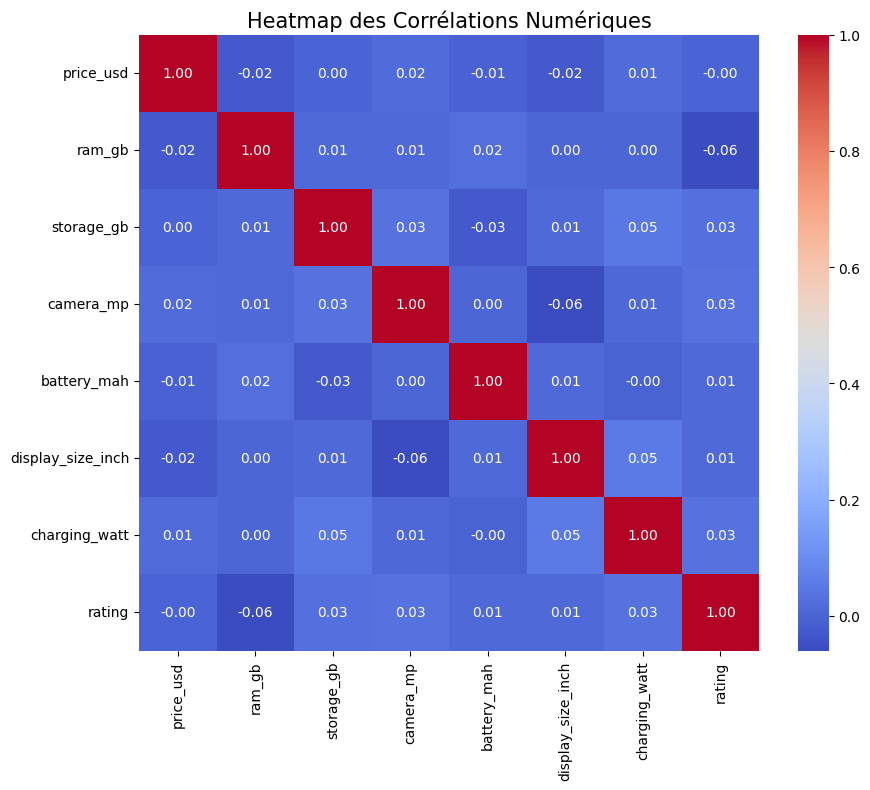

In [6]:
# Mettre en place la figure matplotlib
plt.figure(figsize=(10, 8))

# Dessiner le heatmap
sns.heatmap(matrice_corr, 
            annot=True,     # Afficher les chiffres dans les cases
            fmt='.2f',      # Formater à 2 décimales
            cmap='coolwarm') # Utiliser un dégradé bleu/rouge

plt.title('Heatmap des Corrélations Numériques', fontsize=15)
plt.show()

**Résultat :** Le heatmap confirme visuellement ce que les chiffres ont montré. La première ligne (``price_usd``) est entièrement composée de couleurs neutres (proches de 0), prouvant l'absence de toute relation.

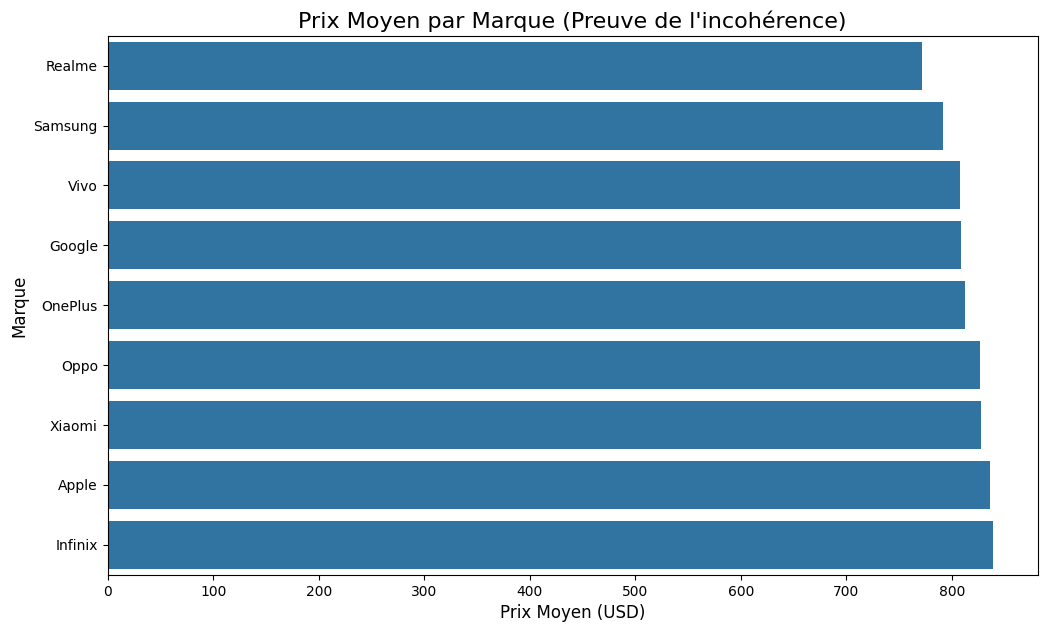

In [7]:
# Calculer le prix moyen pour chaque marque
prix_moyen_par_marque = df_propre.groupby('brand')['price_usd'].mean()

# Trier les valeurs pour le graphique
prix_moyen_trie = prix_moyen_par_marque.sort_values()

# --- L'Illustration Finale ---
# Créer un graphique à barres horizontal pour une lisibilité maximale

plt.figure(figsize=(12, 7))
sns.barplot(x=prix_moyen_trie.values, y=prix_moyen_trie.index)

plt.title('Prix Moyen par Marque (Preuve de l\'incohérence)', fontsize=16)
plt.xlabel('Prix Moyen (USD)', fontsize=12)
plt.ylabel('Marque', fontsize=12)
plt.show()

**Résultat :** Le graphique ci-dessus est la **preuve finale**.

La marque la plus chère est ``Infinix`` (une marque budget).

La deuxième marque la moins chère est ``Samsung`` (une marque premium).

L'écart entre le "plus cher" et le "moins cher" est presque nul.

## Conclusion
**Ma conclusion n'est pas une prédiction de prix, mais un audit de données.**

Ce jeu de données s'est révélé **totalement incohérent** et ne reflète aucune tendance du marché réel. Mon analyse a prouvé que les prix n'étaient corrélés ni aux spécifications techniques (RAM, Stockage), ni à la marque.

**Recommandation :** Ce jeu de données est inutilisable pour une analyse de marché ou pour l'entraînement d'un modèle de prédiction.

Ce projet démontre ma capacité à **ne pas faire aveuglément confiance à un jeu de données** et à utiliser les outils statistiques pour prouver une incohérence avant d'aller plus loin.